In [0]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from sklearn.metrics import confusion_matrix ,accuracy_score,f1_score,recall_score
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)



In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
y_data=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,9:18]
y_data=y_data[y_data>0]# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result.iloc[:,9:10]
y_data=y_data/3.6 #Km/h to m/s

In [0]:
def evaluate():
  index=["less than 2 m/s","medium","more than 10 m/s"]
  print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=index, columns=index))
  print("****************")
  print("Accuracy=","{:.2%}".format(accuracy_score(y_test, y_pred)),"// Model Accuracy=45%")
  results= precision_recall_fscore_support(y_test, y_pred, average=None, )
  df=pd.DataFrame({"Precision":results[0],"Recall":results[1],"F1":results[2],"W_SPD":index})
  df=df.set_index("W_SPD")
  print("Average precision =","{:.2%}".format(df["Precision"].mean()),"// Model precision=28%")
  print("Average recall =","{:.2%}".format(df["Recall"].mean()),"// Model recall=28%")
  results= precision_recall_fscore_support(y_test, y_pred, average='weighted', )
  print("Precision weighted=","{:.2%}".format(results[0]),"//Model weighted=56%")
  print("Recall weighted =","{:.2%}".format(results[1]),"//Model weighted=53%")
  print("****************")
  print(df)

**"less than 2 m/s"=[1,0,0]**
**medium=[0,1,0]**
**more than 10 m/s= [0,0,1]**

In [0]:
y_data_tf=[]
for spd in y_data["value"]:
  if spd<2:
    y_data_tf.append([1,0,0])
  if spd>=2 and spd<10:
    y_data_tf.append([0,1,0])
  if spd>=10:
    y_data_tf.append([0,0,1])
y_data=np.asarray(y_data_tf)

In [8]:
y_data

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=5)

In [67]:
l0 = tf.keras.layers.Dense(units=30, input_shape=[9]) 
l1=tf.keras.layers.Dense(units=15,)
l2 = tf.keras.layers.Dense(units=3,)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                300       
_________________________________________________________________
dense_19 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 48        
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(x_train, y_train, epochs=200, verbose=False)
print("Finished training the model")

Finished training the model


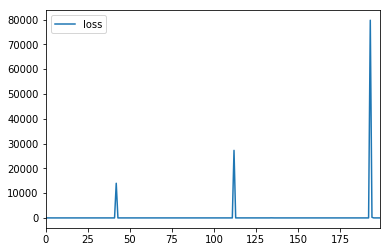

In [69]:
hist=pd.DataFrame(history.history)
hist.plot()

In [0]:
y_pred=model.predict(x_test)


In [0]:
y_pred_str=[]
for c in y_pred:
  if np.argmax(c)==0:
    y_pred_str.append("less than 2 m/s")
  if np.argmax(c)==1:
    y_pred_str.append("medium")
  if np.argmax(c)==2:
    y_pred_str.append("more than 10 m/s")
y_pred=np.asarray(y_pred_str)

y_test_str=[]
for c in y_test:
  if np.argmax(c)==0:
    y_test_str.append("less than 2 m/s")
  if np.argmax(c)==1:
    y_test_str.append("medium")
  if np.argmax(c)==2:
    y_test_str.append("more than 10 m/s")
  
y_test=np.asarray(y_test_str)

In [72]:
evaluate()

                  less than 2 m/s  medium  more than 10 m/s
less than 2 m/s                 0     350                53
medium                        160     940                97
more than 10 m/s               32      57                11
****************
Accuracy= 55.94% // Model Accuracy=45%
Average precision = 25.54% // Model precision=28%
Average recall = 29.84% // Model recall=28%
Precision weighted= 49.54% //Model weighted=56%
Recall weighted = 55.94% //Model weighted=53%
****************
                  Precision    Recall        F1
W_SPD                                          
less than 2 m/s    0.000000  0.000000  0.000000
medium             0.697847  0.785297  0.738994
more than 10 m/s   0.068323  0.110000  0.084291


**Overfit?**

In [0]:
y_pred=model.predict(x_train)
y_test=y_train

In [0]:
y_pred_str=[]
for c in y_pred:
  if np.argmax(c)==0:
    y_pred_str.append("less than 2 m/s")
  if np.argmax(c)==1:
    y_pred_str.append("medium")
  if np.argmax(c)==2:
    y_pred_str.append("more than 10 m/s")
y_pred=np.asarray(y_pred_str)
y_test_str=[]
for c in y_test:
  if np.argmax(c)==0:
    y_test_str.append("less than 2 m/s")
  if np.argmax(c)==1:
    y_test_str.append("medium")
  if np.argmax(c)==2:
    y_test_str.append("more than 10 m/s")
  
y_test=np.asarray(y_test_str)


In [75]:
evaluate()

                  less than 2 m/s  medium  more than 10 m/s
less than 2 m/s                16    1407               173
medium                        539    3831               403
more than 10 m/s              142     230                57
****************
Accuracy= 57.43% // Model Accuracy=45%
Average precision = 27.12% // Model precision=28%
Average recall = 31.52% // Model recall=28%
Precision weighted= 50.30% //Model weighted=56%
Recall weighted = 57.43% //Model weighted=53%
****************
                  Precision    Recall        F1
W_SPD                                          
less than 2 m/s    0.022956  0.010025  0.013956
medium             0.700622  0.802640  0.748169
more than 10 m/s   0.090047  0.132867  0.107345
